## 比特币价格预测
本次挑战收集到了 2010-2018 年比特币历史数据。其中包含交易价格、区块数量、交易费率等信息。我们将尝试使用多项式回归和岭回归方法来预测比特币价格变化趋势。

In [1]:
import pandas as pd

## 代码开始 ### (≈ 2 行代码)
df = pd.read_csv("../../datasets/challenge-2-bitcoin.csv")
df.head()
## 代码结束 ###

Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2010-02-23 00:00:00               0.0           2110700.0             0.0   
1  2010-02-24 00:00:00               0.0           2120200.0             0.0   
2  2010-02-25 00:00:00               0.0           2127600.0             0.0   
3  2010-02-26 00:00:00               0.0           2136100.0             0.0   
4  2010-02-27 00:00:00               0.0           2144750.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000216   
1               0.0              0.0            0.000282   
2               0.0              0.0            0.000227   
3               0.0              0.0            0.000319   
4               0.0              0.0            0.000223   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                    0.0                           1.0   
1                    0.0                           1.0   
2                    0.0                           1.0   
3                    0.0                           1.0   
4                    0.0                           1.0   

   btc_median_confirmation_time  ...  btc_cost_per_transaction_percent  \
0                           0.0  ...                      25100.000000   
1                           0.0  ...                        179.245283   
2                           0.0  ...                       1057.142857   
3                           0.0  ...                         64.582059   
4                           0.0  ...                       1922.222222   

   btc_cost_per_transaction  btc_n_unique_addresses  btc_n_transactions  \
0                       0.0                   252.0               252.0   
1                       0.0                   195.0               196.0   
2                       0.0                   150.0               150.0   
3                       0.0                   176.0               176.0   
4                       0.0                   176.0               176.0   

   btc_n_transactions_total  btc_n_transactions_excluding_popular  \
0                   42613.0                                 252.0   
1                   42809.0                                 196.0   
2                   42959.0                                 150.0   
3                   43135.0                                 176.0   
4                   43311.0                                 176.0   

   btc_n_transactions_excluding_chains_longer_than_100  btc_output_volume  \
0                                              252.0              12600.0   
1                                              196.0              14800.0   
2                                              150.0               8100.0   
3                                              176.0              29349.0   
4                                              176.0               9101.0   

   btc_estimated_transaction_volume  btc_estimated_transaction_volume_usd  
0                              50.0                                   0.0  
1                            5300.0                                   0.0  
2                             700.0                                   0.0  
3                           13162.0                                   0.0  
4                             450.0                                   0.0  

[5 rows x 24 columns]

In [3]:
# 挑战：分离出仅包含 btc_market_price，btc_total_bitcoins，btc_transaction_fees 列的 DataFrame，并定义为变量 data。

## 代码开始 ### (≈ 1 行代码)
data = df[["btc_market_price","btc_total_bitcoins","btc_transaction_fees"]]
data.head()
## 代码结束 ###

btc_market_price  btc_total_bitcoins  btc_transaction_fees
0               0.0           2110700.0                   0.0
1               0.0           2120200.0                   0.0
2               0.0           2127600.0                   0.0
3               0.0           2136100.0                   0.0
4               0.0           2144750.0                   0.0

Text(0, 0.5, 'btc_transaction_fees')

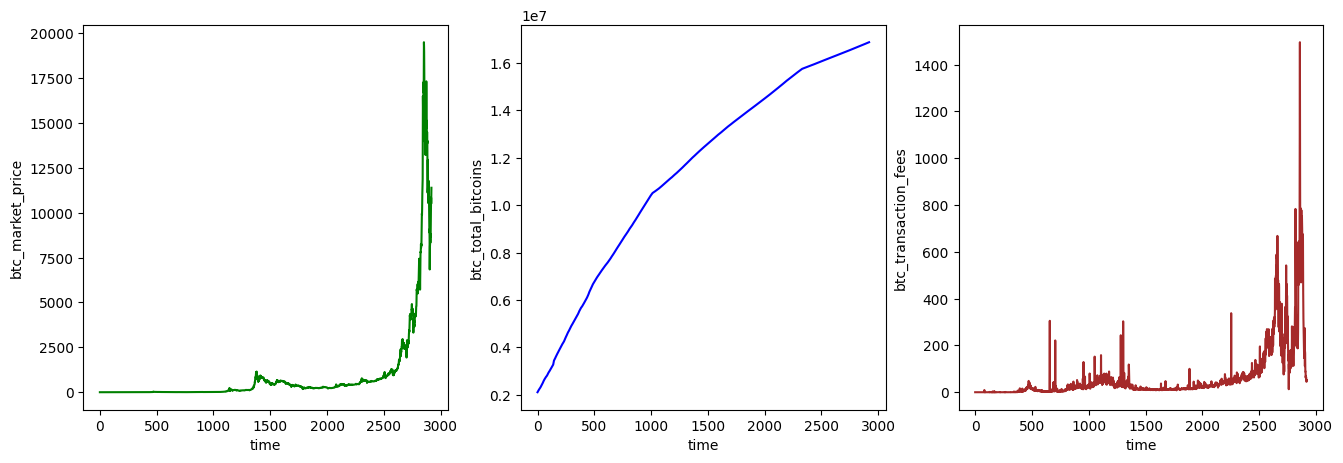

In [4]:
"""
挑战：分别绘制 data 数据集 3 列数据的线形图，并以横向子图排列。

规定：需设置各图横纵轴名称，横轴统一为 time，纵轴为各自列名称。

提示：使用 set_xlabel() 设置横轴名称。
"""

from matplotlib import pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

### 代码开始 ### (≈ 9 行代码)
axes[0].plot(data['btc_market_price'], 'green')
axes[0].set_xlabel('time')
axes[0].set_ylabel('btc_market_price')

axes[1].plot(data['btc_total_bitcoins'], 'blue')
axes[1].set_xlabel('time')
axes[1].set_ylabel('btc_total_bitcoins')

axes[2].plot(data['btc_transaction_fees'], 'brown')
axes[2].set_xlabel('time')
axes[2].set_ylabel('btc_transaction_fees')
### 代码结束 ###

In [6]:
"""
挑战：划分 data 数据集，使得训练集占 70%，而测试集占 30%。

规定：训练集特征、训练集目标、测试集特征、测试集目标分别定义为 X_train, y_train, X_test, y_test，并作为 split_dataset() 函数返回值。
"""

def split_dataset():
    """
    参数:
    无

    返回:
    X_train, y_train, X_test, y_test -- 训练集特征、训练集目标、测试集特征、测试集目标
    """
    
    ### 代码开始 ### (≈ 6 行代码)
    train_data = data[:int(len(data)*0.7)]
    test_data = data[int(len(data)*0.7):]
    
    X_train = train_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_train = train_data[['btc_market_price']]
    
    X_test = test_data[['btc_total_bitcoins', 'btc_transaction_fees']]
    y_test = test_data[['btc_market_price']]
    ### 代码结束 ###
    
    return X_train, y_train, X_test, y_test

len(split_dataset()[0]), len(split_dataset()[1]), len(split_dataset()[2]), len(split_dataset()[
    3]), split_dataset()[0].shape, split_dataset()[1].shape, split_dataset()[2].shape, split_dataset()[3].shape

(2043, 2043, 877, 877, (2043, 2), (2043, 1), (877, 2), (877, 1))

## 多项式回归挑战

In [7]:
# 加载必要模块
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 加载数据
X_train = split_dataset()[0]
y_train = split_dataset()[1]
X_test = split_dataset()[2]
y_test = split_dataset()[3]

In [10]:
"""
挑战：构建 3 次多项式回归预测模型。

规定：使用 scikit-learn 构建 3 次多项式回归预测模型，并计算预测结果的 MAE 评价指标，同时作为 poly3() 函数返回值。
"""

def poly3():
    """
    参数:
    无

    返回:
    mae -- 预测结果的 MAE 评价指标
    """

    ### 代码开始 ### (≈ 7 行代码)
    poly_features = PolynomialFeatures(degree=3, include_bias=False)
    poly_X_train = poly_features.fit_transform(X_train)
    poly_X_test = poly_features.fit_transform(X_test)

    model = LinearRegression()
    model.fit(poly_X_train, y_train)
    pre_y = model.predict(poly_X_test)
    
    mae = mean_absolute_error(y_test, pre_y.flatten())

    ### 代码结束 ###

    return mae

poly3()

1955.8027790559038

In [11]:
"""
挑战：计算 1,2,…,10 次多项式回归预测结果的 MSE 评价指标。

规定：使用 scikit-learn 构建 N 次多项式回归预测模型，并计算 1-10 次多项式预测结果的 MSE 评价指标，同时作为函数 poly_plot(N) 的返回值。
"""

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


def poly_plot(N):
    """
    参数:
    N -- 标量, 多项式次数

    返回:
    mse -- N 次多项式预测结果的 MSE 评价指标列表
    """

    m = 1
    mse = []

    ### 代码开始 ### (≈ 6 行代码)
    for m in range(1,N+1):
        model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
        model.fit(X_train, y_train)
        pre_y = model.predict(X_test)
        mse.append(mean_squared_error(y_test, pre_y.flatten()))
        print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
        print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
        print("---")

    ### 代码结束 ###

    return mse
poly_plot(10)[:10:3]

1 次多项式回归平均绝对误差:  2568.0357148097123
1 次多项式均方误差:  24171680.63629423
---
2 次多项式回归平均绝对误差:  2144.5391830969847
2 次多项式均方误差:  16295550.356746828
---
3 次多项式回归平均绝对误差:  1955.8027790559038
3 次多项式均方误差:  13964194.981132623
---
4 次多项式回归平均绝对误差:  2000.172240313063
4 次多项式均方误差:  23772223.118103277
---
5 次多项式回归平均绝对误差:  3411.9856746491764
5 次多项式均方误差:  101205680.27740996
---
6 次多项式回归平均绝对误差:  6654.471276829741
6 次多项式均方误差:  366168379.4177793
---
7 次多项式回归平均绝对误差:  11201.714949027024
7 次多项式均方误差:  920434357.3560208
---
8 次多项式回归平均绝对误差:  16073.847494941514
8 次多项式均方误差:  1769398340.5524948
---
9 次多项式回归平均绝对误差:  20604.89796839835
9 次多项式均方误差:  2792603953.0631347
---
10 次多项式回归平均绝对误差:  24146.63889193475
10 次多项式均方误差:  3708829651.767486
---


[24171680.63629423, 23772223.118103277, 920434357.3560208, 3708829651.767486]

1 次多项式回归平均绝对误差:  2568.0357148097123
1 次多项式均方误差:  24171680.63629423
---
2 次多项式回归平均绝对误差:  2144.5391830969847
2 次多项式均方误差:  16295550.356746828
---
3 次多项式回归平均绝对误差:  1955.8027790559038
3 次多项式均方误差:  13964194.981132623
---
4 次多项式回归平均绝对误差:  2000.172240313063
4 次多项式均方误差:  23772223.118103277
---
5 次多项式回归平均绝对误差:  3411.9856746491764
5 次多项式均方误差:  101205680.27740996
---
6 次多项式回归平均绝对误差:  6654.471276829741
6 次多项式均方误差:  366168379.4177793
---
7 次多项式回归平均绝对误差:  11201.714949027024
7 次多项式均方误差:  920434357.3560208
---
8 次多项式回归平均绝对误差:  16073.847494941514
8 次多项式均方误差:  1769398340.5524948
---
9 次多项式回归平均绝对误差:  20604.89796839835
9 次多项式均方误差:  2792603953.0631347
---
10 次多项式回归平均绝对误差:  24146.63889193475
10 次多项式均方误差:  3708829651.767486
---


ValueError: Unrecognized marker style '-o'

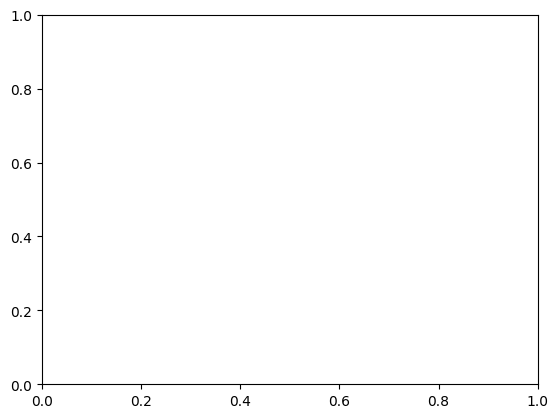

In [13]:
"""
挑战：将 MSE 评价指标绘制成线型图

规定：将 poly_plot(10) 返回的 MSE 列表绘制成组合图（线形图+散点图）。其中，线型图为红色。
"""

mse = poly_plot(10)

## 代码开始 ### (≈ 2 行代码)
# plt.plot([i for i in range(1, 11)], mse, 'r')
# plt.scatter([i for i in range(1, 11)], mse)

plt.plot(mse, marker='-o')

## 代码结束 ###

plt.title("MSE")
plt.xlabel("N")
plt.ylabel("MSE")